<a href="https://colab.research.google.com/github/paulnord/ExampleCode/blob/main/LSTM_fitting_chirp_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Toy LSTM Fitting.  


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Parameters
num_samples = 10000  # Total number of samples
sequence_length = 200  # Length of each input sequence
frequency_range = (5, 75)  # Frequency range for sine wave
amplitude_range = (1.0, 5.0)  # Amplitude range for sine wave
phase_shift_range = (0, 2 * np.pi)  # Phase shift range for sine wave
noise_level = 2.0  # Standard deviation of added Gaussian noise

# Dataset split ratios
train_ratio = 0.7
validation_ratio = 0.2
test_ratio = 0.1

# Calculate dataset sizes
num_train = int(num_samples * train_ratio)
num_validation = int(num_samples * validation_ratio)
num_test = num_samples - num_train - num_validation

def generate_data(num_samples):
    inputs = []
    outputs = []

    for _ in range(num_samples):
        frequency = np.random.uniform(*frequency_range)
        amplitude = np.random.uniform(*amplitude_range)
        phase_shift = np.random.uniform(*phase_shift_range)

        # Generate sine wave
        x = np.linspace(0, 2 * np.pi, sequence_length)
        sine_wave = amplitude * np.sin(frequency * x / (2 * np.pi) + phase_shift)

        # Add noise
        sine_wave_noisy = sine_wave + np.random.normal(0, noise_level, size=sequence_length)

        # Append data
        inputs.append(sine_wave_noisy.tolist())  # Convert to list for proper CSV serialization
        outputs.append([frequency, amplitude, phase_shift])

    return inputs, np.array(outputs)

# Generate datasets
train_inputs, train_outputs = generate_data(num_train)
validation_inputs, validation_outputs = generate_data(num_validation)
test_inputs, test_outputs = generate_data(num_test)

# Normalize Outputs
output_scaler = MinMaxScaler(feature_range=(0, 1))
train_outputs = output_scaler.fit_transform(train_outputs)
validation_outputs = output_scaler.transform(validation_outputs)
test_outputs = output_scaler.transform(test_outputs)

# Save to CSV files
def save_to_csv(inputs, outputs, file_name):
    data = pd.DataFrame({
        'inputs': [','.join(map(str, input_row)) for input_row in inputs],  # Properly format inputs with commas
        'frequency': outputs[:, 0],
        'amplitude': outputs[:, 1],
        'phase_shift': outputs[:, 2],
    })
    data.to_csv(file_name, index=False)

save_to_csv(train_inputs, train_outputs, "train_data.csv")
save_to_csv(validation_inputs, validation_outputs, "validation_data.csv")
save_to_csv(test_inputs, test_outputs, "test_data.csv")

print("Data files created: train_data.csv, validation_data.csv, test_data.csv")


Data files created: train_data.csv, validation_data.csv, test_data.csv


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Parameters
num_samples = 10000  # Total number of samples
sequence_length = 200  # Length of each input sequence
frequency_range = (5, 75)  # Frequency range for sine wave
amplitude_range = (1.0, 5.0)  # Amplitude range for sine wave
phase_shift_range = (0, 2 * np.pi)  # Phase shift range for sine wave

# Dataset split ratios
train_ratio = 0.7
validation_ratio = 0.2
test_ratio = 0.1

# Calculate dataset sizes
num_train = int(num_samples * train_ratio)
num_validation = int(num_samples * validation_ratio)
num_test = num_samples - num_train - num_validation

def generate_data(num_samples, noise_level):
    inputs = []
    outputs = []

    for _ in range(num_samples):
        frequency = np.random.uniform(*frequency_range)
        amplitude = np.random.uniform(*amplitude_range)
        phase_shift = np.random.uniform(*phase_shift_range)

        # Generate sine wave
        x = np.linspace(0, 2 * np.pi, sequence_length)
        sine_wave = amplitude * np.sin(frequency * x / (2 * np.pi) + phase_shift)

        # Add noise
        sine_wave_noisy = sine_wave + np.random.normal(0, noise_level, size=sequence_length)

        # Append data
        inputs.append(sine_wave_noisy.tolist())  # Convert to list for proper CSV serialization
        outputs.append([frequency, amplitude, phase_shift])

    return inputs, np.array(outputs)

# Function to normalize and save data
def save_normalized_data(noise_level, prefix):
    # Generate datasets
    train_inputs, train_outputs = generate_data(num_train, noise_level)
    validation_inputs, validation_outputs = generate_data(num_validation, noise_level)
    test_inputs, test_outputs = generate_data(num_test, noise_level)

    # Normalize Outputs
    output_scaler = MinMaxScaler(feature_range=(0, 1))
    train_outputs = output_scaler.fit_transform(train_outputs)
    validation_outputs = output_scaler.transform(validation_outputs)
    test_outputs = output_scaler.transform(test_outputs)

    # Save to CSV files
    def save_to_csv(inputs, outputs, file_name):
        data = pd.DataFrame({
            'inputs': [','.join(map(str, input_row)) for input_row in inputs],  # Properly format inputs with commas
            'frequency': outputs[:, 0],
            'amplitude': outputs[:, 1],
            'phase_shift': outputs[:, 2],
        })
        data.to_csv(file_name, index=False)

    save_to_csv(train_inputs, train_outputs, f"{prefix}_train_data.csv")
    save_to_csv(validation_inputs, validation_outputs, f"{prefix}_validation_data.csv")
    save_to_csv(test_inputs, test_outputs, f"{prefix}_test_data.csv")

# Create datasets for each noise level
for noise_level, prefix in zip([2.0, 5.0, 10.0], ["low_noise", "medium_noise", "high_noise"]):
    save_normalized_data(noise_level, prefix)

# Indicate completion
"Data files created for noise levels: 2.0, 5.0, 10.0"


'Data files created for noise levels: 2.0, 5.0, 10.0'

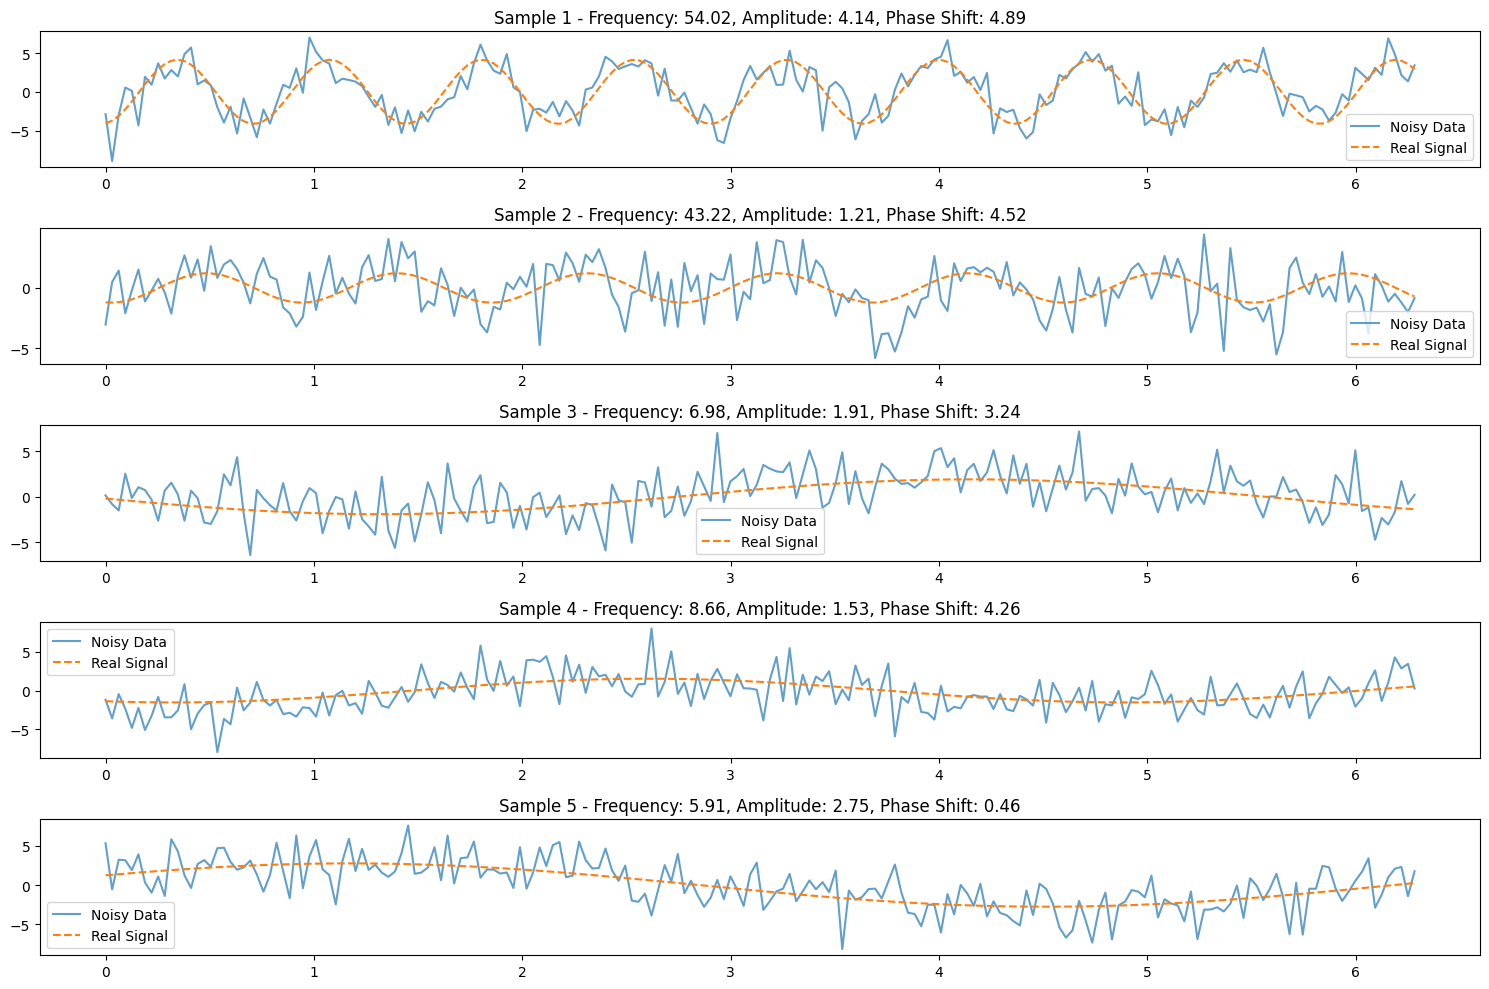

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reusing the load_data function
def load_data(file_name):
    data = pd.read_csv(file_name)

    # Parse inputs into a 2D NumPy array
    inputs = np.array(
        [np.array(eval(row)) if isinstance(row, str) else row for row in data["inputs"]]
    )

    # Extract outputs as a NumPy array
    outputs = data[["frequency", "amplitude", "phase_shift"]].values
    return inputs, outputs


# Load the training data
train_file = "low_noise_train_data.csv"
inputs, outputs = load_data(train_file)

def inverse_normalize(normalized_values, min_val, max_val):
    """
    Reverses the normalization of a value scaled between [0, 1].

    Parameters:
    - normalized_values: The normalized value(s) (array or single value).
    - min_val: Minimum value of the original range.
    - max_val: Maximum value of the original range.

    Returns:
    - Original values rescaled to the given range.
    """
    return normalized_values * (max_val - min_val) + min_val



# Plot a few samples
num_samples_to_plot = 5
plt.figure(figsize=(15, 10))
x = np.linspace(0, 2 * np.pi, 200)  # X-axis for the sine wave

for i in range(num_samples_to_plot):
    noisy_data = inputs[i]
    frequency, amplitude, phase_shift = outputs[i]
    # Reverse normalization
    frequency = inverse_normalize(frequency, *frequency_range)
    amplitude = inverse_normalize(amplitude, *amplitude_range)
    phase_shift = inverse_normalize(phase_shift, *phase_shift_range)
    real_signal = amplitude * np.sin(frequency * x / (2 * np.pi) + phase_shift)

    plt.subplot(num_samples_to_plot, 1, i + 1)
    plt.plot(x, noisy_data, label="Noisy Data", alpha=0.7)
    plt.plot(x, real_signal, label="Real Signal", linestyle="--")
    plt.title(f"Sample {i + 1} - Frequency: {frequency:.2f}, Amplitude: {amplitude:.2f}, Phase Shift: {phase_shift:.2f}")
    plt.legend()

plt.tight_layout()
plt.show()


Is GPU available?  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 196, 64)             │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 98, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_6 (Bidirectional)      │ (None, 98, 256)             │         197,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 98, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ (None, 98, 256)             │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 98, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_8 (Bidirectional)      │ (None, 256)                 │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,085,571 (4.14 MB)

 Trainable params: 1,085,571 (4.14 MB)

 Non-trainable params: 0 (0.00 B)

None


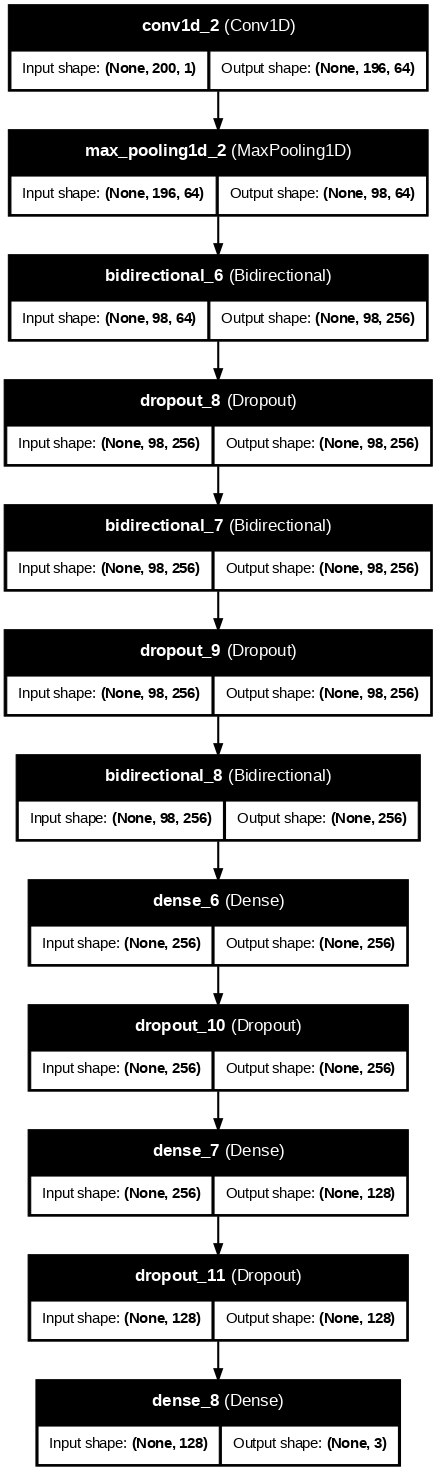

Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.1035 - mae: 0.2512 - val_loss: 0.0252 - val_mae: 0.1150
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0405 - mae: 0.1530 - val_loss: 0.0211 - val_mae: 0.1004
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0329 - mae: 0.1356 - val_loss: 0.0214 - val_mae: 0.1058
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0289 - mae: 0.1253 - val_loss: 0.0166 - val_mae: 0.0830
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0261 - mae: 0.1176 - val_loss: 0.0179 - val_mae: 0.0863
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0263 - mae: 0.1181 - val_loss: 0.0158 - val_mae: 0.0768
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0230 - mae: 0.1085 - val_loss: 0.0198 - val_mae: 0.0935
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0219 - mae: 0.1060 - val_loss: 0.0133 - val_mae: 0.0699
Epoch 9/100
110/110 ━━━━━━━━━━━━━━━━━━

In [22]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam, Adagrad
from tensorflow.config import list_physical_devices
from IPython.display import Image, display
from tensorflow.keras.losses import MeanSquaredError

# Check if GPU is available
gpu_available = list_physical_devices('GPU')
print("Is GPU available? ", gpu_available)

# Helper function to load data from CSV
def load_data(file_name):
    data = pd.read_csv(file_name)
    inputs = np.array([np.fromstring(row.strip("[]"), sep=",") for row in data["inputs"]])
    outputs = data[["frequency", "amplitude", "phase_shift"]].values
    return inputs, outputs

# file naming setup
file_prefix = "low_noise_"
train_file = file_prefix + "train_data.csv"
validation_file = file_prefix + "validation_data.csv"
test_file = file_prefix + "test_data.csv"

# Load datasets
train_inputs, train_outputs = load_data(train_file)
validation_inputs, validation_outputs = load_data(validation_file)
test_inputs, test_outputs = load_data(test_file)

# Reshape inputs for LSTM: (samples, time_steps, features)
train_inputs = train_inputs.reshape(train_inputs.shape[0], train_inputs.shape[1], 1)
validation_inputs = validation_inputs.reshape(validation_inputs.shape[0], validation_inputs.shape[1], 1)
test_inputs = test_inputs.reshape(test_inputs.shape[0], test_inputs.shape[1], 1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Bidirectional, BatchNormalization

# Build the model
model = Sequential()

# Convolutional layer to extract local features
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(train_inputs.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))  # Downsample the sequence

# Stacked Bidirectional LSTM layers
model.add(Bidirectional(LSTM(128, activation='tanh', return_sequences=True)))
model.add(Dropout(0.3))  # Dropout for regularization
model.add(Bidirectional(LSTM(128, activation='tanh', return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(128, activation='tanh')))

# Dense layers for prediction
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3))  # Output layer for frequency, amplitude, phase_shift

model.compile(optimizer='adam', loss=MeanSquaredError(), metrics=['mae'])

print(model.summary())


# Generate a diagram of the model and display it inline
plot_file = "model_diagram.png"
plot_model(model, to_file=plot_file, show_shapes=True, show_layer_names=True, dpi=75)

# Display the diagram in Colab
display(Image(plot_file))

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_inputs, train_outputs,
    validation_data=(validation_inputs, validation_outputs),
    epochs=100,
    batch_size=64,
    callbacks=[early_stopping]
)

# Evaluate on the test set
test_loss, test_mae = model.evaluate(test_inputs, test_outputs)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Make predictions on the test set
predictions = model.predict(test_inputs)

# Save predictions and test outputs for comparison
predictions_df = pd.DataFrame(predictions, columns=["predicted_frequency", "predicted_amplitude", "predicted_phase_shift"])
actuals_df = pd.DataFrame(test_outputs, columns=["actual_frequency", "actual_amplitude", "actual_phase_shift"])
comparison_df = pd.concat([predictions_df, actuals_df], axis=1)
comparison_df.to_csv("predictions_vs_actuals.csv", index=False)

print("Predictions vs Actuals saved to predictions_vs_actuals.csv")

# Save the model after initial training
model.save("initial_model.keras")
print("Model saved to 'initial_model.keras'")


   predicted_frequency  predicted_amplitude  predicted_phase_shift  \
0             0.634564             0.571231               0.566017   
1             0.652615             0.133348               0.332043   
2             0.351261             0.864499               0.126487   
3             0.142705             0.172487               0.752159   
4             0.081258             0.642359               0.435816   

   actual_frequency  actual_amplitude  actual_phase_shift  
0          0.626693          0.491795            0.537364  
1          0.706321          0.006347            0.162757  
2          0.304506          0.929844            0.147064  
3          0.138331          0.250110            0.943812  
4          0.050176          0.673856            0.419054  


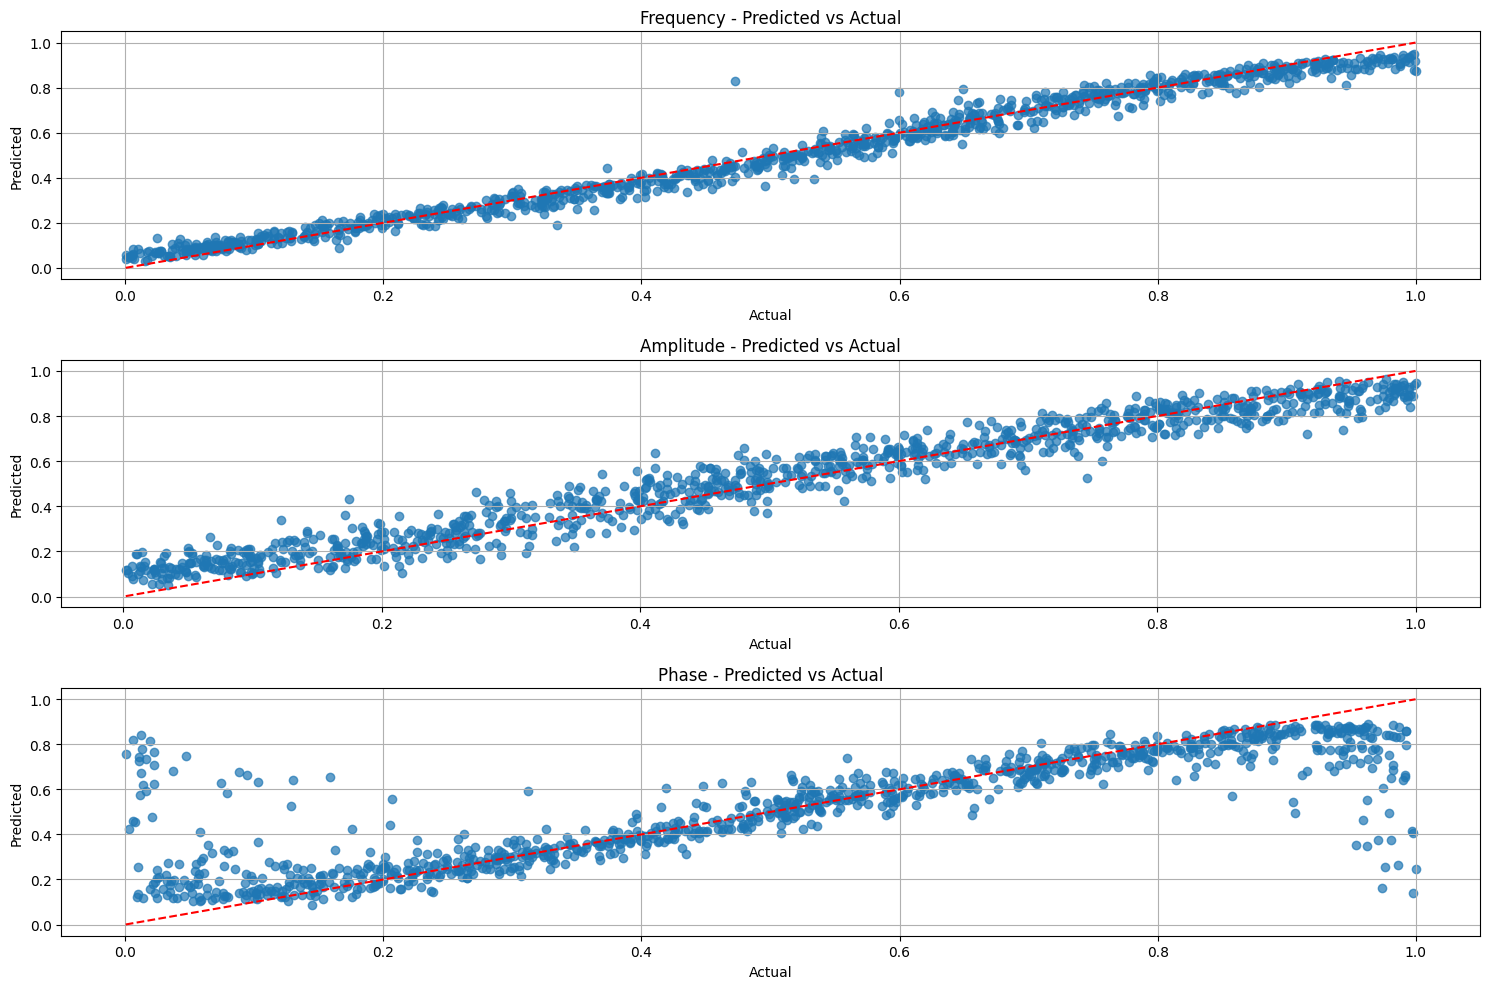

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the predictions vs actuals data
predictions_file = "predictions_vs_actuals.csv"
data = pd.read_csv(predictions_file)

# Display the predictions vs actuals data
print(data.head())  # Show the first few rows of the dataset

# Extract columns for plotting
predicted_columns = ["predicted_frequency", "predicted_amplitude", "predicted_phase_shift"]
actual_columns = ["actual_frequency", "actual_amplitude", "actual_phase_shift"]

# Plot each correlation
plt.figure(figsize=(15, 10))

for i, (predicted, actual) in enumerate(zip(predicted_columns, actual_columns)):
    plt.subplot(3, 1, i + 1)
    plt.scatter(data[actual], data[predicted], alpha=0.7)
    plt.plot(
        [data[actual].min(), data[actual].max()],
        [data[actual].min(), data[actual].max()],
        color='red', linestyle='--'
    )
    plt.title(f"{actual.split('_')[1].capitalize()} - Predicted vs Actual")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.grid(True)

plt.tight_layout()
plt.show()



In [28]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model

# Helper function to load data from CSV
def load_data(file_name):
    data = pd.read_csv(file_name)
    inputs = np.array([np.fromstring(row.strip("[]"), sep=",") for row in data["inputs"]])
    outputs = data[["frequency", "amplitude", "phase_shift"]].values
    return inputs, outputs

# File naming setup for medium noise
file_prefix = "medium_noise_"
train_file = file_prefix + "train_data.csv"
validation_file = file_prefix + "validation_data.csv"
test_file = file_prefix + "test_data.csv"

# Load datasets
train_inputs, train_outputs = load_data(train_file)
validation_inputs, validation_outputs = load_data(validation_file)
test_inputs, test_outputs = load_data(test_file)

# Reshape inputs for LSTM: (samples, time_steps, features)
train_inputs = train_inputs.reshape(train_inputs.shape[0], train_inputs.shape[1], 1)
validation_inputs = validation_inputs.reshape(validation_inputs.shape[0], validation_inputs.shape[1], 1)
test_inputs = test_inputs.reshape(test_inputs.shape[0], test_inputs.shape[1], 1)

# Load pre-trained model
model = load_model("initial_model.keras")
print("Model loaded from 'initial_model.keras'")

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Continue training with medium noise data
# Train the model
history = model.fit(
    train_inputs, train_outputs,
    validation_data=(validation_inputs, validation_outputs),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]
)

# Evaluate on the test set
test_loss, test_mae = model.evaluate(test_inputs, test_outputs)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Make predictions on the test set
predictions = model.predict(test_inputs)

# Save predictions and test outputs for comparison
predictions_df = pd.DataFrame(predictions, columns=["predicted_frequency", "predicted_amplitude", "predicted_phase_shift"])
actuals_df = pd.DataFrame(test_outputs, columns=["actual_frequency", "actual_amplitude", "actual_phase_shift"])
comparison_df = pd.concat([predictions_df, actuals_df], axis=1)
comparison_df.to_csv("finetuned_predictions_vs_actuals.csv", index=False)

print("Predictions vs Actuals saved to finetuned_predictions_vs_actuals.csv")

# Save the updated model after fine-tuning
model.save("fine_tuned_model.keras")
print("Fine-tuned model saved to 'fine_tuned_model.keras'")


Model loaded from 'initial_model.keras'
Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - loss: 0.0453 - mae: 0.1606 - val_loss: 0.0330 - val_mae: 0.1282
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.0351 - mae: 0.1386 - val_loss: 0.0300 - val_mae: 0.1188
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0336 - mae: 0.1335 - val_loss: 0.0288 - val_mae: 0.1140
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 0.0299 - mae: 0.1243 - val_loss: 0.0284 - val_mae: 0.1118
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 0.0324 - mae: 0.1281 - val_loss: 0.0298 - val_mae: 0.1202
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0295 - mae: 0.1238 - val_loss: 0.0278 - val_mae: 0.1125
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0291 - mae: 0.1222 - val_loss: 0.0281 - val_mae: 0.1147
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.0301 - mae: 0.1230 - val_loss: 0.0277 - val_mae: 0

   predicted_frequency  predicted_amplitude  predicted_phase_shift  \
0             0.623212             0.694200               0.189488   
1             0.484361             0.406755               0.662890   
2             0.194520             0.271021               0.701045   
3             0.349008             0.188629               0.646289   
4             0.859781             0.444893               0.812115   

   actual_frequency  actual_amplitude  actual_phase_shift  
0          0.613144          0.625698            0.065926  
1          0.557468          0.497740            0.560527  
2          0.324349          0.219982            0.780904  
3          0.202491          0.077314            0.720790  
4          0.821009          0.549822            0.983136  


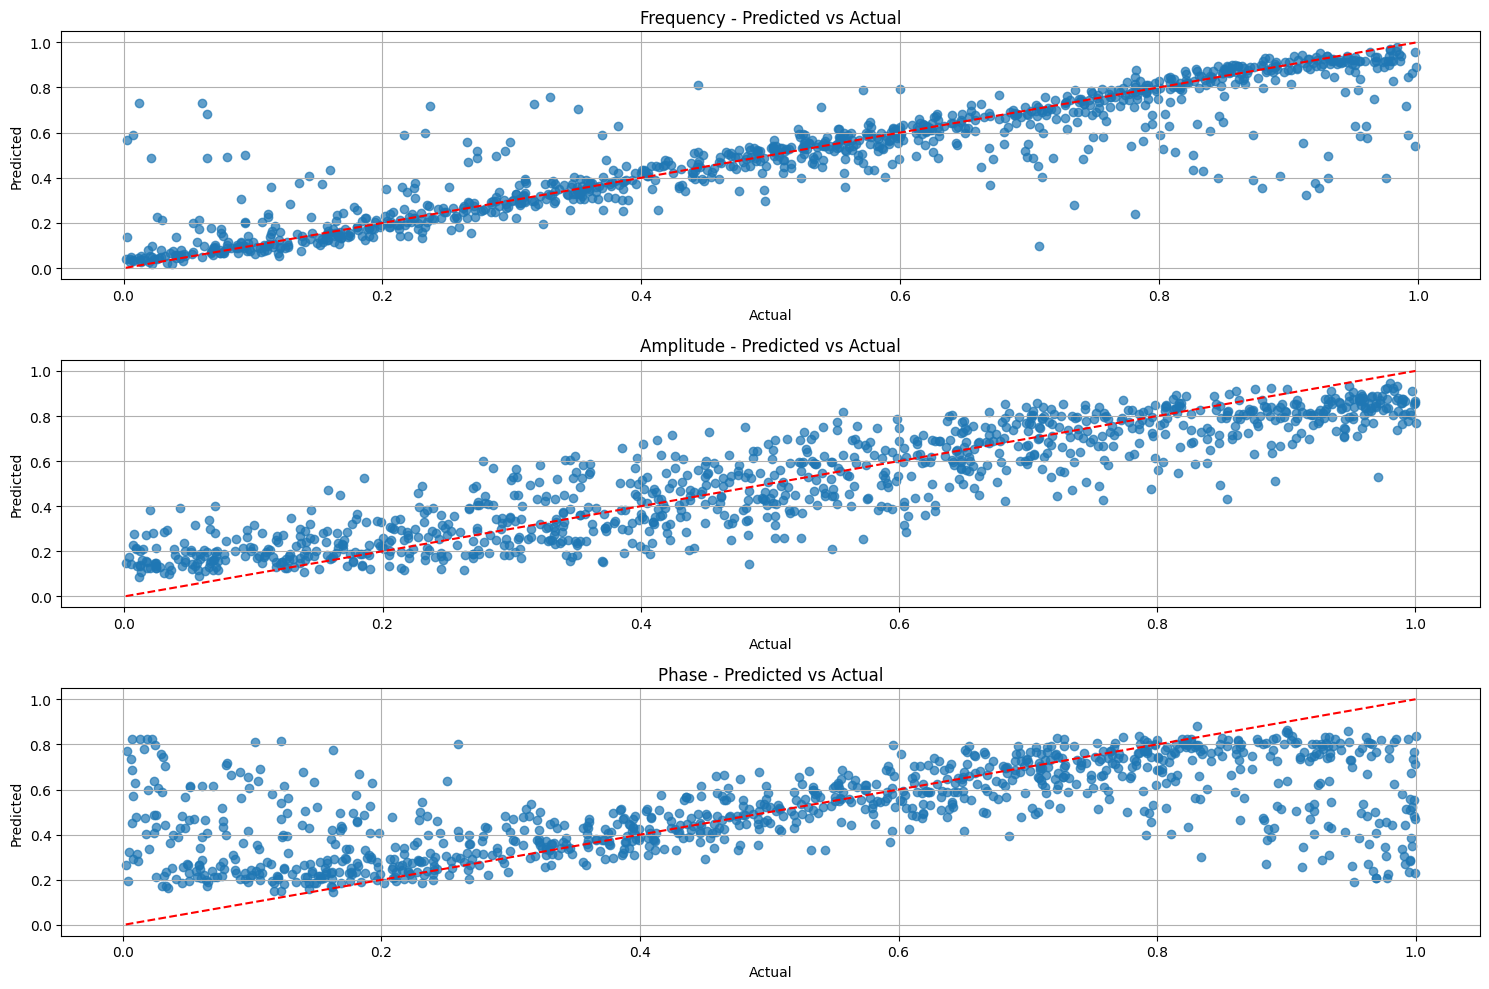

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the predictions vs actuals data
predictions_file = "finetuned_predictions_vs_actuals.csv"
data = pd.read_csv(predictions_file)

# Display the predictions vs actuals data
print(data.head())  # Show the first few rows of the dataset

# Extract columns for plotting
predicted_columns = ["predicted_frequency", "predicted_amplitude", "predicted_phase_shift"]
actual_columns = ["actual_frequency", "actual_amplitude", "actual_phase_shift"]

# Plot each correlation
plt.figure(figsize=(15, 10))

for i, (predicted, actual) in enumerate(zip(predicted_columns, actual_columns)):
    plt.subplot(3, 1, i + 1)
    plt.scatter(data[actual], data[predicted], alpha=0.7)
    plt.plot(
        [data[actual].min(), data[actual].max()],
        [data[actual].min(), data[actual].max()],
        color='red', linestyle='--'
    )
    plt.title(f"{actual.split('_')[1].capitalize()} - Predicted vs Actual")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.grid(True)

plt.tight_layout()
plt.show()



In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Parameters for the dataset
num_samples = 10000  # Total number of samples
sequence_length = 500  # Length of each chirp waveform
f0_range = (10, 50)  # Initial frequency range (Hz)
fc_range = (60, 200)  # Final frequency range (Hz)
amplitude_range = (0.5, 2.0)  # Amplitude growth factor range
noise_level = 0.2  # Standard deviation of Gaussian noise

# Dataset split ratios
train_ratio = 0.7
validation_ratio = 0.2
test_ratio = 0.1

# Calculate dataset sizes
num_train = int(num_samples * train_ratio)
num_validation = int(num_samples * validation_ratio)
num_test = num_samples - num_train - num_validation

def generate_chirp_data(num_samples):
    inputs = []
    outputs = []

    for _ in range(num_samples):
        # Randomly sample parameters
        f0 = np.random.uniform(*f0_range)
        fc = np.random.uniform(*fc_range)
        A = np.random.uniform(*amplitude_range)

        # Time array
        T = 1.0  # Total duration (seconds)
        t = np.linspace(0, T, sequence_length)

        # Frequency as a function of time
        k = (fc - f0) / T  # Frequency growth rate
        f_t = f0 + k * t**2  # Quadratic frequency growth

        # Phase integration (integral of frequency over time)
        phi_t = 2 * np.pi * np.cumsum(f_t) * (t[1] - t[0])  # Numerical integration

        # Chirp waveform
        h_t = A * t**0.5 * np.sin(phi_t)

        # Add Gaussian noise
        h_t_noisy = h_t + np.random.normal(0, noise_level, size=sequence_length)

        # Append data
        inputs.append(h_t_noisy.tolist())  # Convert to list for proper CSV serialization
        outputs.append([f0, fc, A])

    return inputs, np.array(outputs)

# Generate datasets
train_inputs, train_outputs = generate_chirp_data(num_train)
validation_inputs, validation_outputs = generate_chirp_data(num_validation)
test_inputs, test_outputs = generate_chirp_data(num_test)

# Normalize Outputs
output_scaler = MinMaxScaler(feature_range=(0, 1))
train_outputs = output_scaler.fit_transform(train_outputs)
validation_outputs = output_scaler.transform(validation_outputs)
test_outputs = output_scaler.transform(test_outputs)

# Save to CSV files
def save_to_csv(inputs, outputs, file_name):
    data = pd.DataFrame({
        'inputs': [','.join(map(str, input_row)) for input_row in inputs],  # Properly format inputs with commas
        'f0': outputs[:, 0],
        'fc': outputs[:, 1],
        'amplitude': outputs[:, 2],
    })
    data.to_csv(file_name, index=False)

save_to_csv(train_inputs, train_outputs, "chirp_train_data.csv")
save_to_csv(validation_inputs, validation_outputs, "chirp_validation_data.csv")
save_to_csv(test_inputs, test_outputs, "chirp_test_data.csv")

"Chirp dataset created: chirp_train_data.csv, chirp_validation_data.csv, chirp_test_data.csv"


'Chirp dataset created: chirp_train_data.csv, chirp_validation_data.csv, chirp_test_data.csv'

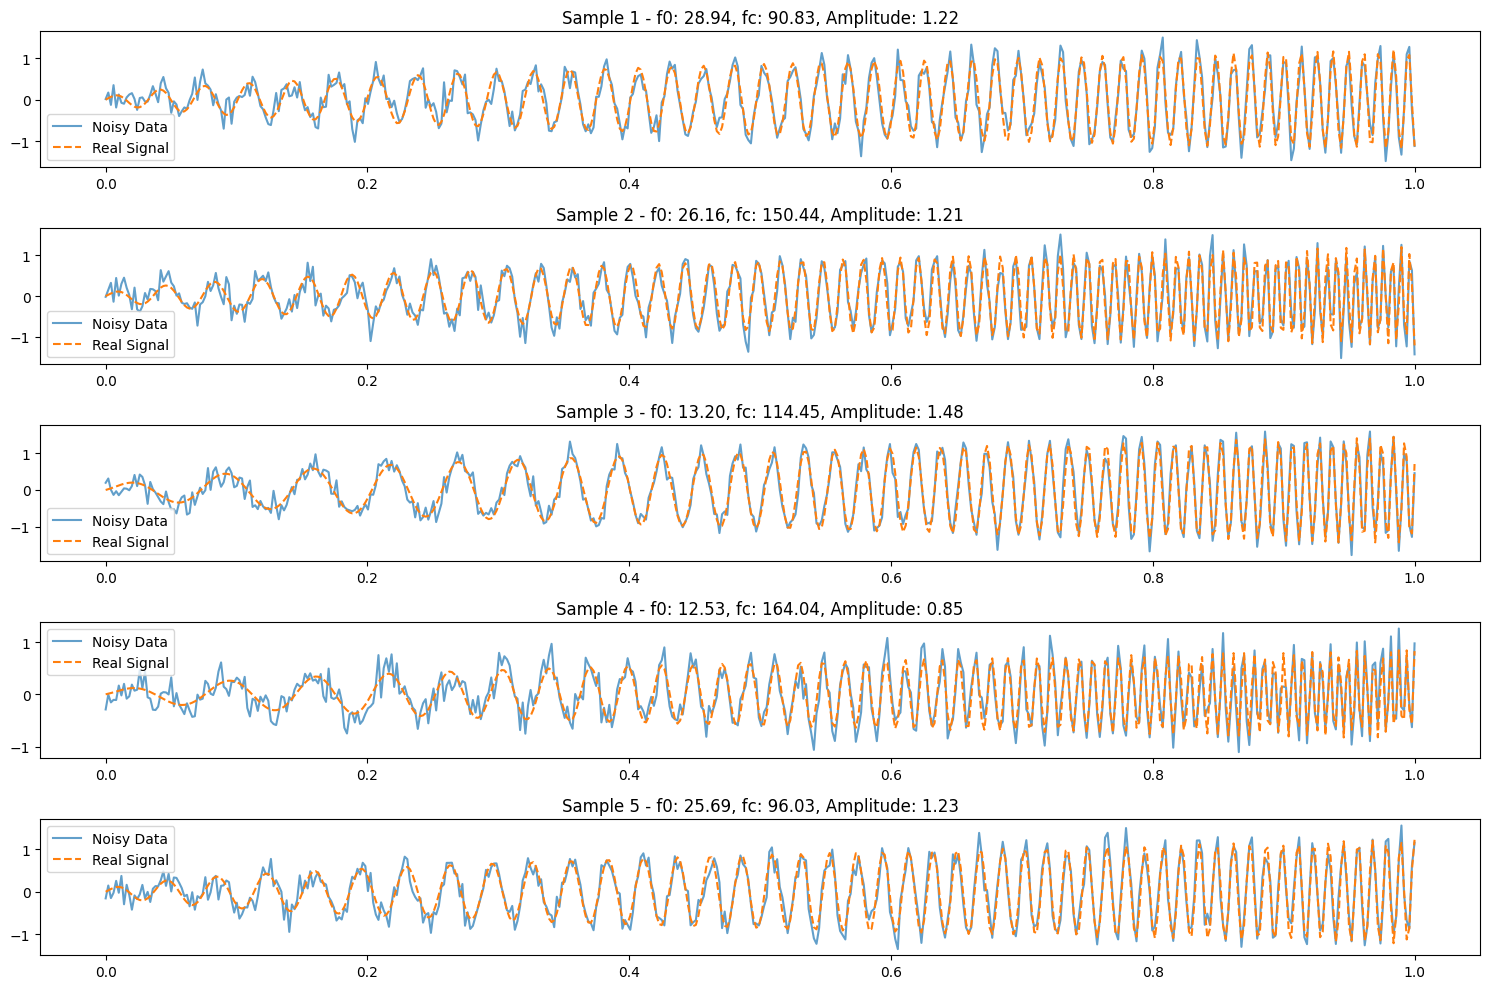

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to load data
def load_data(file_name):
    """
    Load chirp waveform data from a CSV file.
    """
    data = pd.read_csv(file_name)

    # Parse inputs into a 2D NumPy array
    inputs = np.array(
        [np.array(eval(row)) if isinstance(row, str) else row for row in data["inputs"]]
    )

    # Extract outputs as a NumPy array
    outputs = data[["f0", "fc", "amplitude"]].values
    return inputs, outputs

# Function to reverse normalization
def inverse_normalize(normalized_values, min_val, max_val):
    """
    Reverses the normalization of a value scaled between [0, 1].

    Parameters:
    - normalized_values: The normalized value(s) (array or single value).
    - min_val: Minimum value of the original range.
    - max_val: Maximum value of the original range.

    Returns:
    - Original values rescaled to the given range.
    """
    return normalized_values * (max_val - min_val) + min_val

# Visualization function
def visualize_chirp_data(file_name, f0_range, fc_range, amplitude_range, num_samples_to_plot=5):
    """
    Visualize noisy and real chirp waveforms.

    Parameters:
    - file_name: Path to the CSV file containing chirp data.
    - f0_range: Tuple (min, max) for initial frequency.
    - fc_range: Tuple (min, max) for final frequency.
    - amplitude_range: Tuple (min, max) for amplitude.
    - num_samples_to_plot: Number of samples to plot.
    """
    # Load the data
    inputs, outputs = load_data(file_name)

    # Plot
    plt.figure(figsize=(15, 10))
    for i in range(num_samples_to_plot):
        noisy_data = inputs[i]
        f0, fc, amplitude = outputs[i]  # These are normalized values

        # Reverse normalization
        f0 = inverse_normalize(f0, *f0_range)
        fc = inverse_normalize(fc, *fc_range)
        amplitude = inverse_normalize(amplitude, *amplitude_range)

        # Generate the "true" chirp signal for comparison
        t = np.linspace(0, 1, len(noisy_data))
        k = (fc - f0) / 1.0  # Growth rate for frequency
        f_t = f0 + k * t**2
        phi_t = 2 * np.pi * np.cumsum(f_t) * (t[1] - t[0])  # Phase integration
        real_signal = amplitude * t**0.5 * np.sin(phi_t)

        plt.subplot(num_samples_to_plot, 1, i + 1)
        plt.plot(t, noisy_data, label="Noisy Data", alpha=0.7)
        plt.plot(t, real_signal, label="Real Signal", linestyle="--")
        plt.title(f"Sample {i + 1} - f0: {f0:.2f}, fc: {fc:.2f}, Amplitude: {amplitude:.2f}")
        plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage
chirp_file = "chirp_train_data.csv"
f0_range = (10, 50)  # Initial frequency range (Hz)
fc_range = (60, 200)  # Final frequency range (Hz)
amplitude_range = (0.5, 2.0)  # Amplitude range

visualize_chirp_data(chirp_file, f0_range, fc_range, amplitude_range, num_samples_to_plot=5)


Is GPU available?  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 496, 64)             │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 248, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 248, 256)            │         197,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 248, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 248, 256)            │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 248, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 256)                 │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,085,571 (4.14 MB)

 Trainable params: 1,085,571 (4.14 MB)

 Non-trainable params: 0 (0.00 B)

None


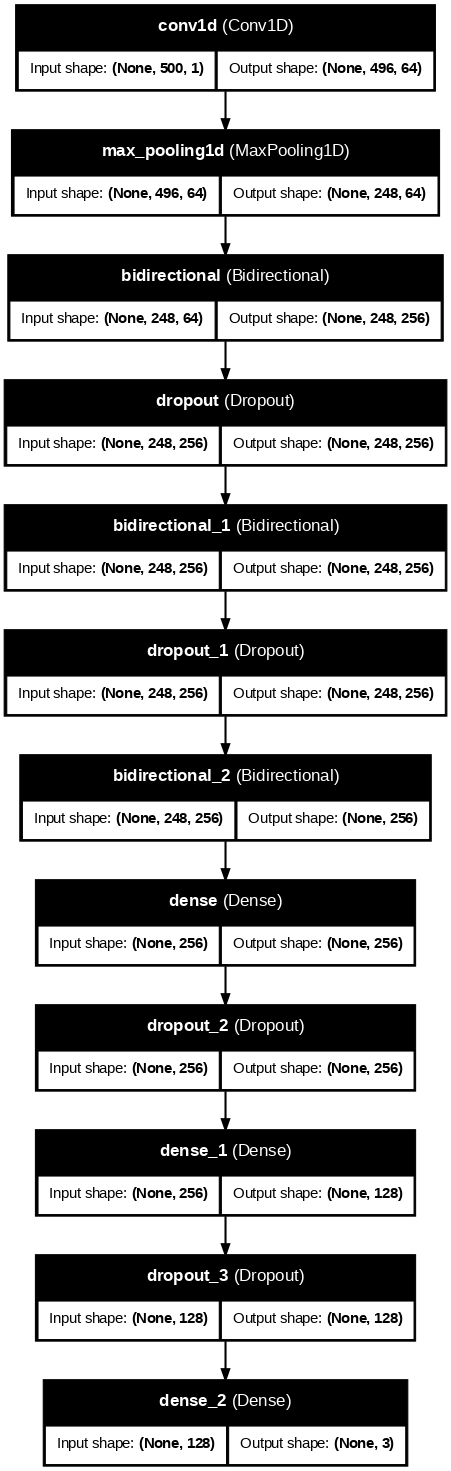

Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step - loss: 0.1043 - mae: 0.2487 - val_loss: 0.0235 - val_mae: 0.1071
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/step - loss: 0.0324 - mae: 0.1375 - val_loss: 0.0072 - val_mae: 0.0641
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 24s 124ms/step - loss: 0.0182 - mae: 0.1039 - val_loss: 0.0030 - val_mae: 0.0392
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - loss: 0.0149 - mae: 0.0938 - val_loss: 0.0037 - val_mae: 0.0447
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - loss: 0.0141 - mae: 0.0910 - val_loss: 0.0026 - val_mae: 0.0401
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - loss: 0.0117 - mae: 0.0834 - val_loss: 0.0027 - val_mae: 0.0386
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - loss: 0.0115 - mae: 0.0824 - val_loss: 0.0034 - val_mae: 0.0437
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - loss: 0.0112 - mae: 0.0819 - val_loss: 0.0064 - val_mae: 0.0585
Epoch 9/100
110/110 ━━━━━━━━━━

In [3]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.utils import plot_model
from IPython.display import Image, display
from tensorflow.config import list_physical_devices

# Check if GPU is available
gpu_available = list_physical_devices('GPU')
print("Is GPU available? ", gpu_available)

# Helper function to load data
def load_data(file_name, input_col="inputs", output_cols=None):
    """
    Loads data from a CSV file and extracts inputs and outputs.

    Parameters:
    - file_name: Path to the CSV file.
    - input_col: Name of the column containing input sequences.
    - output_cols: List of column names for outputs.

    Returns:
    - inputs: NumPy array of input sequences.
    - outputs: NumPy array of output parameters.
    """
    data = pd.read_csv(file_name)

    # Parse inputs into a 2D NumPy array
    inputs = np.array(
        [np.array(eval(row)) if isinstance(row, str) else row for row in data[input_col]]
    )

    # Extract outputs if specified
    if output_cols:
        outputs = data[output_cols].values
    else:
        outputs = None

    return inputs, outputs


# Model definition function
def create_model(input_shape, output_dim):
    """
    Builds and returns the neural network model.

    Parameters:
    - input_shape: Tuple specifying the input shape (time_steps, features).
    - output_dim: Number of outputs (e.g., 3 for frequency, amplitude, phase shift).

    Returns:
    - model: Compiled Keras model.
    """
    model = Sequential()

    # Convolutional layer to extract local features
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))  # Downsample the sequence

    # Stacked Bidirectional LSTM layers
    model.add(Bidirectional(LSTM(128, activation='tanh', return_sequences=True)))
    model.add(Dropout(0.3))  # Dropout for regularization
    model.add(Bidirectional(LSTM(128, activation='tanh', return_sequences=True)))
    model.add(Dropout(0.3))
    model.add(Bidirectional(LSTM(128, activation='tanh')))

    # Dense layers for prediction
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(output_dim))  # Output layer

    model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=['mae'])
    return model


# Training function
def train_model(model, train_inputs, train_outputs, validation_inputs, validation_outputs, epochs=100, batch_size=64):
    """
    Trains the given model on the provided data.

    Parameters:
    - model: The Keras model to train.
    - train_inputs: Training input data.
    - train_outputs: Training output data.
    - validation_inputs: Validation input data.
    - validation_outputs: Validation output data.
    - epochs: Number of training epochs.
    - batch_size: Batch size for training.

    Returns:
    - history: Training history object.
    """
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(
        train_inputs, train_outputs,
        validation_data=(validation_inputs, validation_outputs),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping]
    )
    return history


# File prefixes and column names
file_prefix = "chirp_"
input_col = "inputs"
output_cols = ["f0", "fc", "amplitude"]

# File paths
train_file = file_prefix + "train_data.csv"
validation_file = file_prefix + "validation_data.csv"
test_file = file_prefix + "test_data.csv"

# Load data
train_inputs, train_outputs = load_data(train_file, input_col, output_cols)
validation_inputs, validation_outputs = load_data(validation_file, input_col, output_cols)
test_inputs, test_outputs = load_data(test_file, input_col, output_cols)

# Reshape inputs for LSTM
train_inputs = train_inputs.reshape(train_inputs.shape[0], train_inputs.shape[1], 1)
validation_inputs = validation_inputs.reshape(validation_inputs.shape[0], validation_inputs.shape[1], 1)
test_inputs = test_inputs.reshape(test_inputs.shape[0], test_inputs.shape[1], 1)

# Create and train the model
model = create_model(input_shape=(train_inputs.shape[1], 1), output_dim=len(output_cols))
print(model.summary())

# Save and display model architecture
plot_file = "model_diagram.png"
plot_model(model, to_file=plot_file, show_shapes=True, show_layer_names=True, dpi=75)
display(Image(plot_file))

# Train the model
history = train_model(
    model, train_inputs, train_outputs, validation_inputs, validation_outputs
)

# Evaluate on test set
test_loss, test_mae = model.evaluate(test_inputs, test_outputs)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Save predictions for analysis
predictions = model.predict(test_inputs)
predictions_df = pd.DataFrame(predictions, columns=[f"predicted_{col}" for col in output_cols])
actuals_df = pd.DataFrame(test_outputs, columns=[f"actual_{col}" for col in output_cols])
comparison_df = pd.concat([predictions_df, actuals_df], axis=1)
comparison_df.to_csv("predictions_vs_actuals.csv", index=False)
print("Predictions vs Actuals saved to predictions_vs_actuals.csv")

# Save the trained model
model.save("trained_model.keras")
print("Trained model saved to 'trained_model.keras'")


Sample of the data:
   predicted_f0  predicted_fc  predicted_amplitude  actual_f0  actual_fc  \
0      0.709288      0.356234             0.907679   0.698430   0.348262   
1      0.123140      0.664662             0.197885   0.093605   0.680899   
2      0.137603      0.088333             0.733076   0.121413   0.035940   
3      0.093324      0.895297             0.187873   0.023130   0.903821   
4      0.514507      0.419208             0.918483   0.522392   0.393600   

   actual_amplitude  
0          0.970125  
1          0.154842  
2          0.783698  
3          0.131172  
4          0.976858  


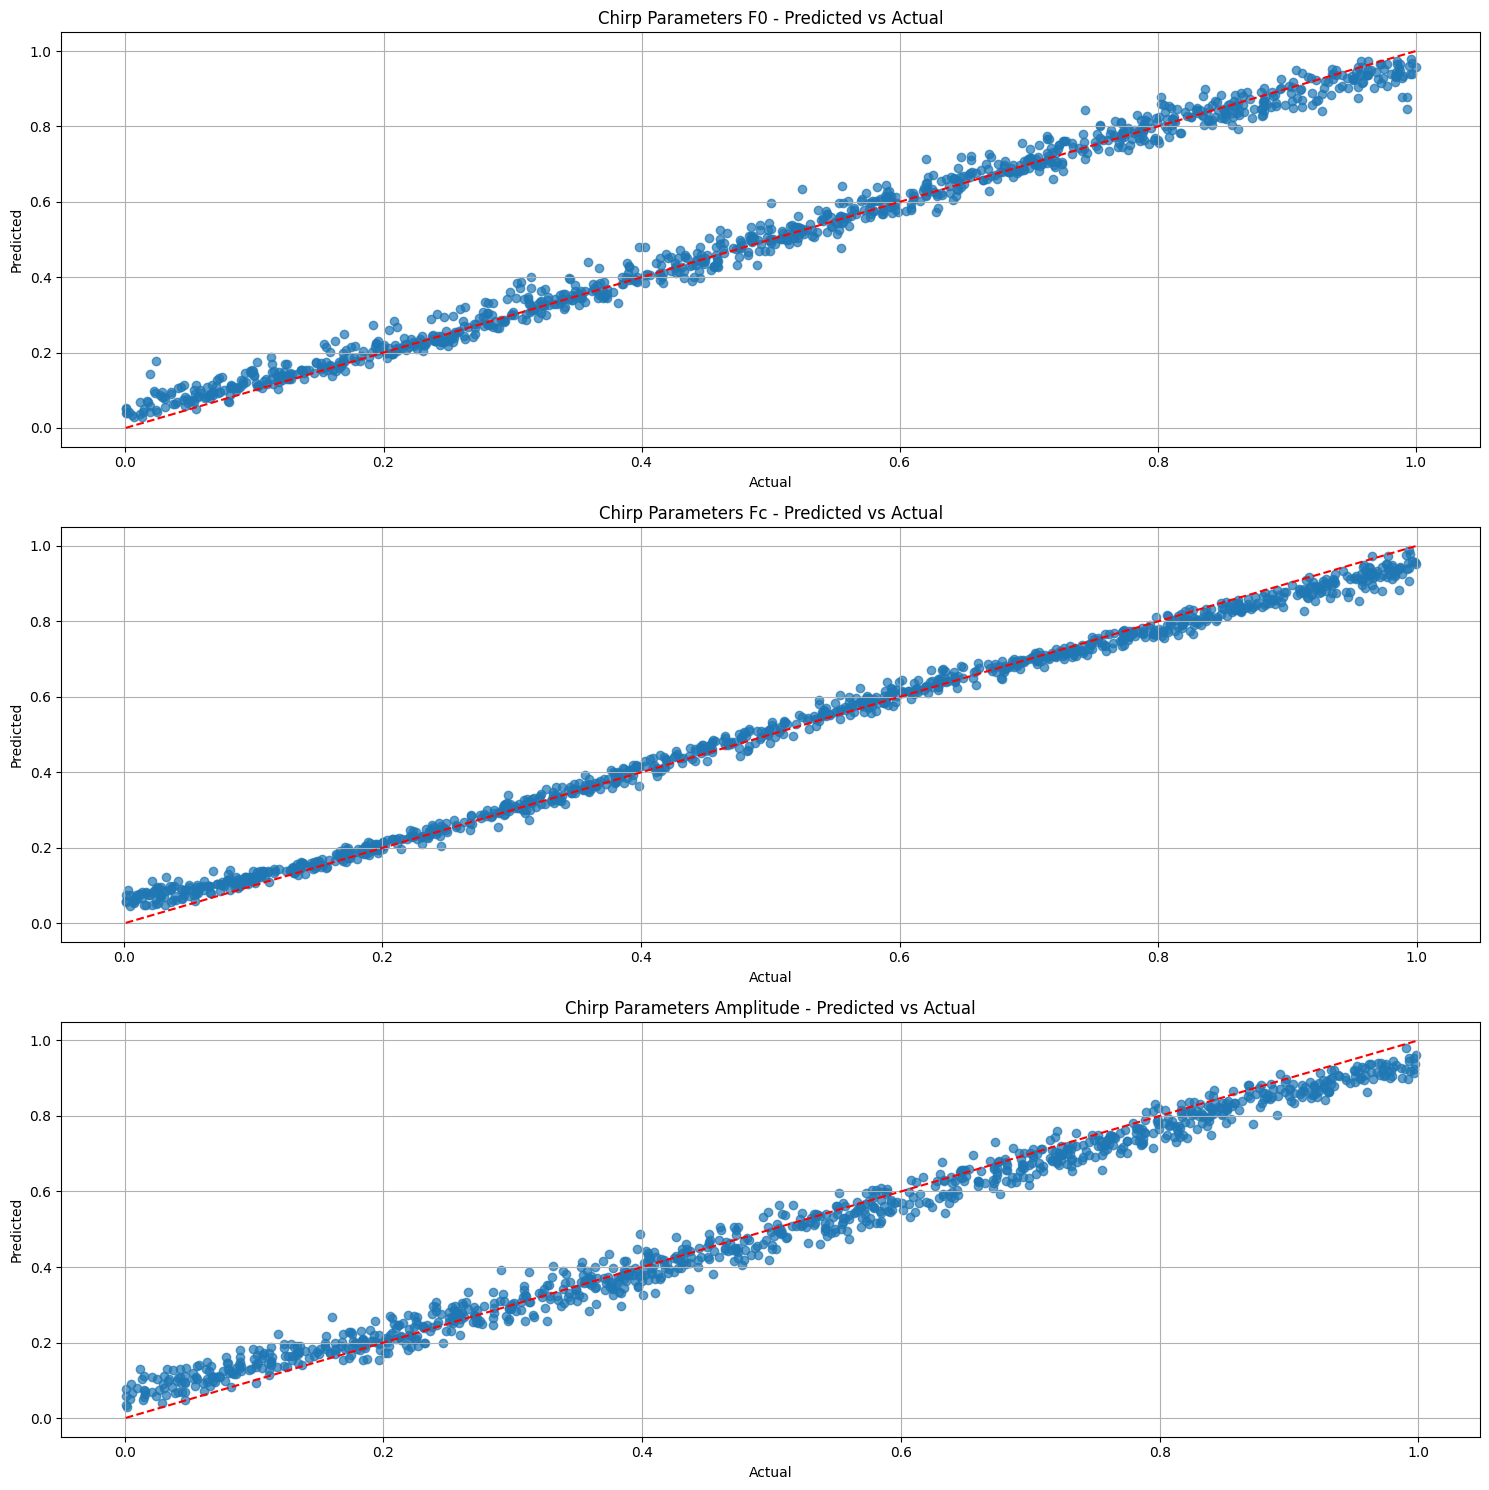

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_predictions_vs_actuals(
    predictions_file, predicted_columns, actual_columns, title_prefix="Parameter"
):
    """
    Plots the predicted vs actual correlations for a model.

    Parameters:
    - predictions_file: Path to the CSV file containing predictions and actuals.
    - predicted_columns: List of column names for predicted values.
    - actual_columns: List of column names for actual values.
    - title_prefix: Prefix for plot titles (default: "Parameter").
    """
    # Load the predictions vs actuals data
    data = pd.read_csv(predictions_file)

    # Display the predictions vs actuals data
    print("Sample of the data:")
    print(data.head())

    # Plot each correlation
    plt.figure(figsize=(15, 5 * len(predicted_columns)))  # Adjust height based on number of plots

    for i, (predicted, actual) in enumerate(zip(predicted_columns, actual_columns)):
        plt.subplot(len(predicted_columns), 1, i + 1)
        plt.scatter(data[actual], data[predicted], alpha=0.7)
        plt.plot(
            [data[actual].min(), data[actual].max()],
            [data[actual].min(), data[actual].max()],
            color='red', linestyle='--'
        )
        plt.title(f"{title_prefix} {actual.split('_')[1].capitalize()} - Predicted vs Actual")
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Example usage
predictions_file = "predictions_vs_actuals.csv"
# Updated column names for f0, fc, and amplitude
predicted_columns = ["predicted_f0", "predicted_fc", "predicted_amplitude"]
actual_columns = ["actual_f0", "actual_fc", "actual_amplitude"]

# Call the generalized plotting function
plot_predictions_vs_actuals(
    predictions_file,
    predicted_columns,
    actual_columns,
    title_prefix="Chirp Parameters"
)